In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movi=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/A_Association Rules/my_movies.csv")
movi

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
df=pd.get_dummies(movi)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Case 1

MINIMUM SUPPORT: 0.5

In [4]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Sixth Sense, Gladiator)"
6,0.6,"(Patriot, Gladiator)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(V2_Patriot, Gladiator)"
9,0.6,"(Patriot, V1_Gladiator)"


In [5]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [6]:
rules.sort_values('confidence',ascending = False)[0:25]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(V2_Patriot, Gladiator)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
27,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
28,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,(V1_Gladiator),"(V2_Patriot, Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V2_Patriot),"(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [7]:
rules[rules.confidence<1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
17,(Gladiator),"(Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
24,(Gladiator),"(Patriot, V2_Patriot)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
29,(Gladiator),"(V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
49,(Gladiator),"(Patriot, V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


In [8]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


These are the independently dominant consequents.

Text(0.5, 1.0, 'Support v Confidence')

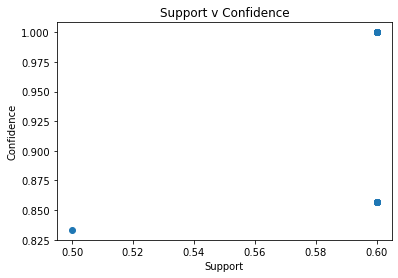

In [9]:
plt.scatter(rules.support,rules.confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support v Confidence')

Text(0.5, 1.0, 'Support v Lift')

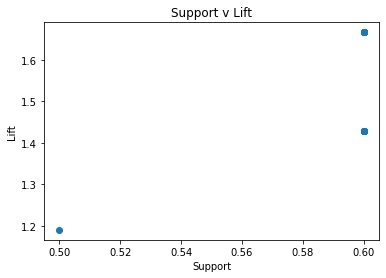

In [10]:
plt.scatter(rules.support,rules.lift)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support v Lift')

Text(0.5, 1.0, 'Confidence v Lift')

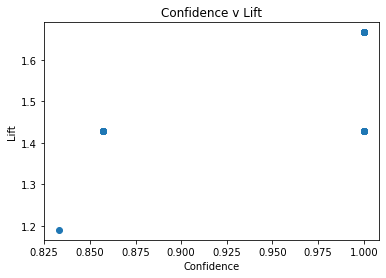

In [11]:
plt.scatter(rules.confidence,rules.lift)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence v Lift')

# Case 2

MINIMUM SUPPORT: 0.3

In [12]:
frequent_itemsets1 = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Sixth Sense, Gladiator, V2_Patriot, V3_Sixth ..."
59,0.4,"(Sixth Sense, Gladiator, V1_Gladiator, V2_Patr..."
60,0.4,"(Sixth Sense, V1_Gladiator, V2_Patriot, V3_Six..."
61,0.4,"(Gladiator, V1_Gladiator, V2_Patriot, V3_Sixth..."


In [13]:
rules = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(Sixth Sense, V1_Gladiator, V2_Patriot, V3_Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
598,(V1_Gladiator),"(Sixth Sense, Gladiator, V2_Patriot, V3_Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V2_Patriot),"(Sixth Sense, Gladiator, V1_Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V3_Sixth Sense),"(Sixth Sense, Gladiator, V1_Gladiator, V2_Patr...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


In [14]:
rules.sort_values('confidence',ascending = False)[0:25]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
301,(V2_Patriot),"(Patriot, Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
429,"(Patriot, Sixth Sense, V2_Patriot)","(Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
431,"(V2_Patriot, Gladiator, V3_Sixth Sense)","(Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
433,"(Patriot, Gladiator, V3_Sixth Sense)","(Sixth Sense, V2_Patriot)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
434,"(Patriot, V2_Patriot, V3_Sixth Sense)","(Sixth Sense, Gladiator)",0.4,0.5,0.4,1.0,2.000000,0.20,inf
242,"(Sixth Sense, V1_Gladiator)","(Patriot, V2_Patriot)",0.4,0.6,0.4,1.0,1.666667,0.16,inf
241,"(Sixth Sense, V2_Patriot)","(Patriot, V1_Gladiator)",0.4,0.6,0.4,1.0,1.666667,0.16,inf
436,"(Sixth Sense, V2_Patriot)","(Patriot, Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.0,2.500000,0.24,inf
437,"(Sixth Sense, V3_Sixth Sense)","(Patriot, V2_Patriot, Gladiator)",0.4,0.6,0.4,1.0,1.666667,0.16,inf
238,"(Patriot, Sixth Sense)","(V2_Patriot, V1_Gladiator)",0.4,0.6,0.4,1.0,1.666667,0.16,inf


In [15]:
rules[rules.confidence<1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
596,(Sixth Sense),"(Gladiator, V1_Gladiator, V2_Patriot, V3_Sixth...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
597,(Gladiator),"(Sixth Sense, V1_Gladiator, V2_Patriot, V3_Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
598,(V1_Gladiator),"(Sixth Sense, Gladiator, V2_Patriot, V3_Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V2_Patriot),"(Sixth Sense, Gladiator, V1_Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [16]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(Sixth Sense, V1_Gladiator, V2_Patriot, V3_Six...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
598,(V1_Gladiator),"(Sixth Sense, Gladiator, V2_Patriot, V3_Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
599,(V2_Patriot),"(Sixth Sense, Gladiator, V1_Gladiator, V3_Sixt...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V3_Sixth Sense),"(Sixth Sense, Gladiator, V1_Gladiator, V2_Patr...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf


Lift>1. Consequents are independently dominant.

Text(0.5, 1.0, 'Support v Confidence')

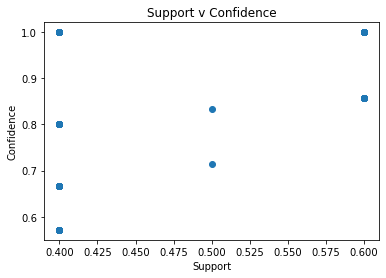

In [17]:
plt.scatter(rules.support,rules.confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support v Confidence')

Text(0.5, 1.0, 'Support v Lift')

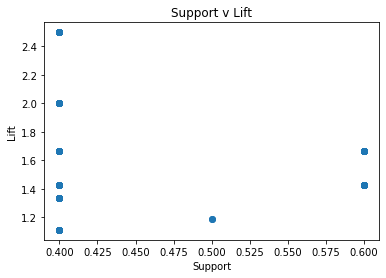

In [18]:
plt.scatter(rules.support,rules.lift)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support v Lift')

Text(0.5, 1.0, 'Confidence v Lift')

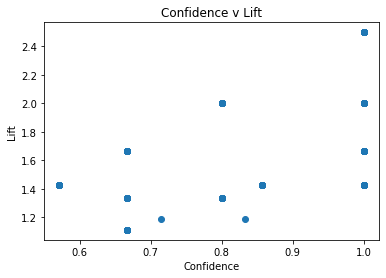

In [19]:
plt.scatter(rules.confidence,rules.lift)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence v Lift')

# Case 3

MINIMUM SUPPORT: 0.6

In [20]:
frequent_itemsets2 = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.6,"(Patriot, Gladiator)"
6,0.6,"(Gladiator, V1_Gladiator)"
7,0.6,"(V2_Patriot, Gladiator)"
8,0.6,"(Patriot, V1_Gladiator)"
9,0.6,"(Patriot, V2_Patriot)"


In [21]:
rules = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [22]:
rules.sort_values('confidence',ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(Gladiator),"(V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
48,(Gladiator),"(Patriot, V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
23,(Gladiator),"(Patriot, V2_Patriot)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
16,(Gladiator),"(Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
30,"(Patriot, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
31,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
32,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


In [23]:
rules[rules.confidence<1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
16,(Gladiator),"(Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
23,(Gladiator),"(Patriot, V2_Patriot)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
28,(Gladiator),"(V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
48,(Gladiator),"(Patriot, V2_Patriot, V1_Gladiator)",0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


In [24]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
5,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


These are independently dominant consequents.

Text(0.5, 1.0, 'Support v Confidence')

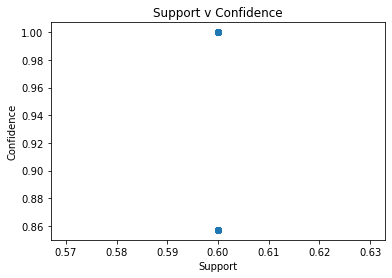

In [25]:
plt.scatter(rules.support,rules.confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support v Confidence')

Text(0.5, 1.0, 'Support v Lift')

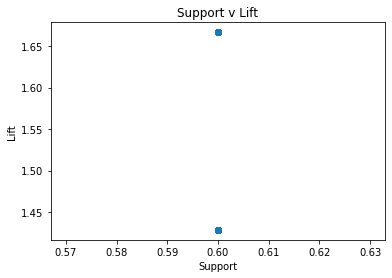

In [26]:
plt.scatter(rules.support,rules.lift)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support v Lift')

Text(0.5, 1.0, 'Confidence v Lift')

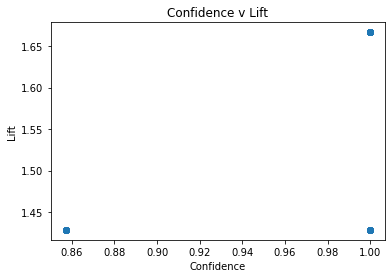

In [27]:
plt.scatter(rules.confidence,rules.lift)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence v Lift')